<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 99.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 99.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


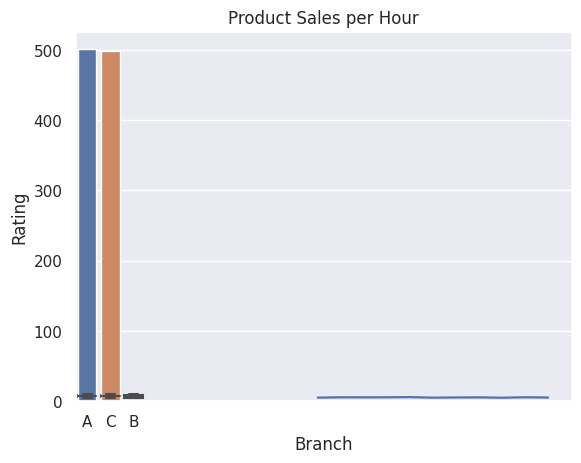

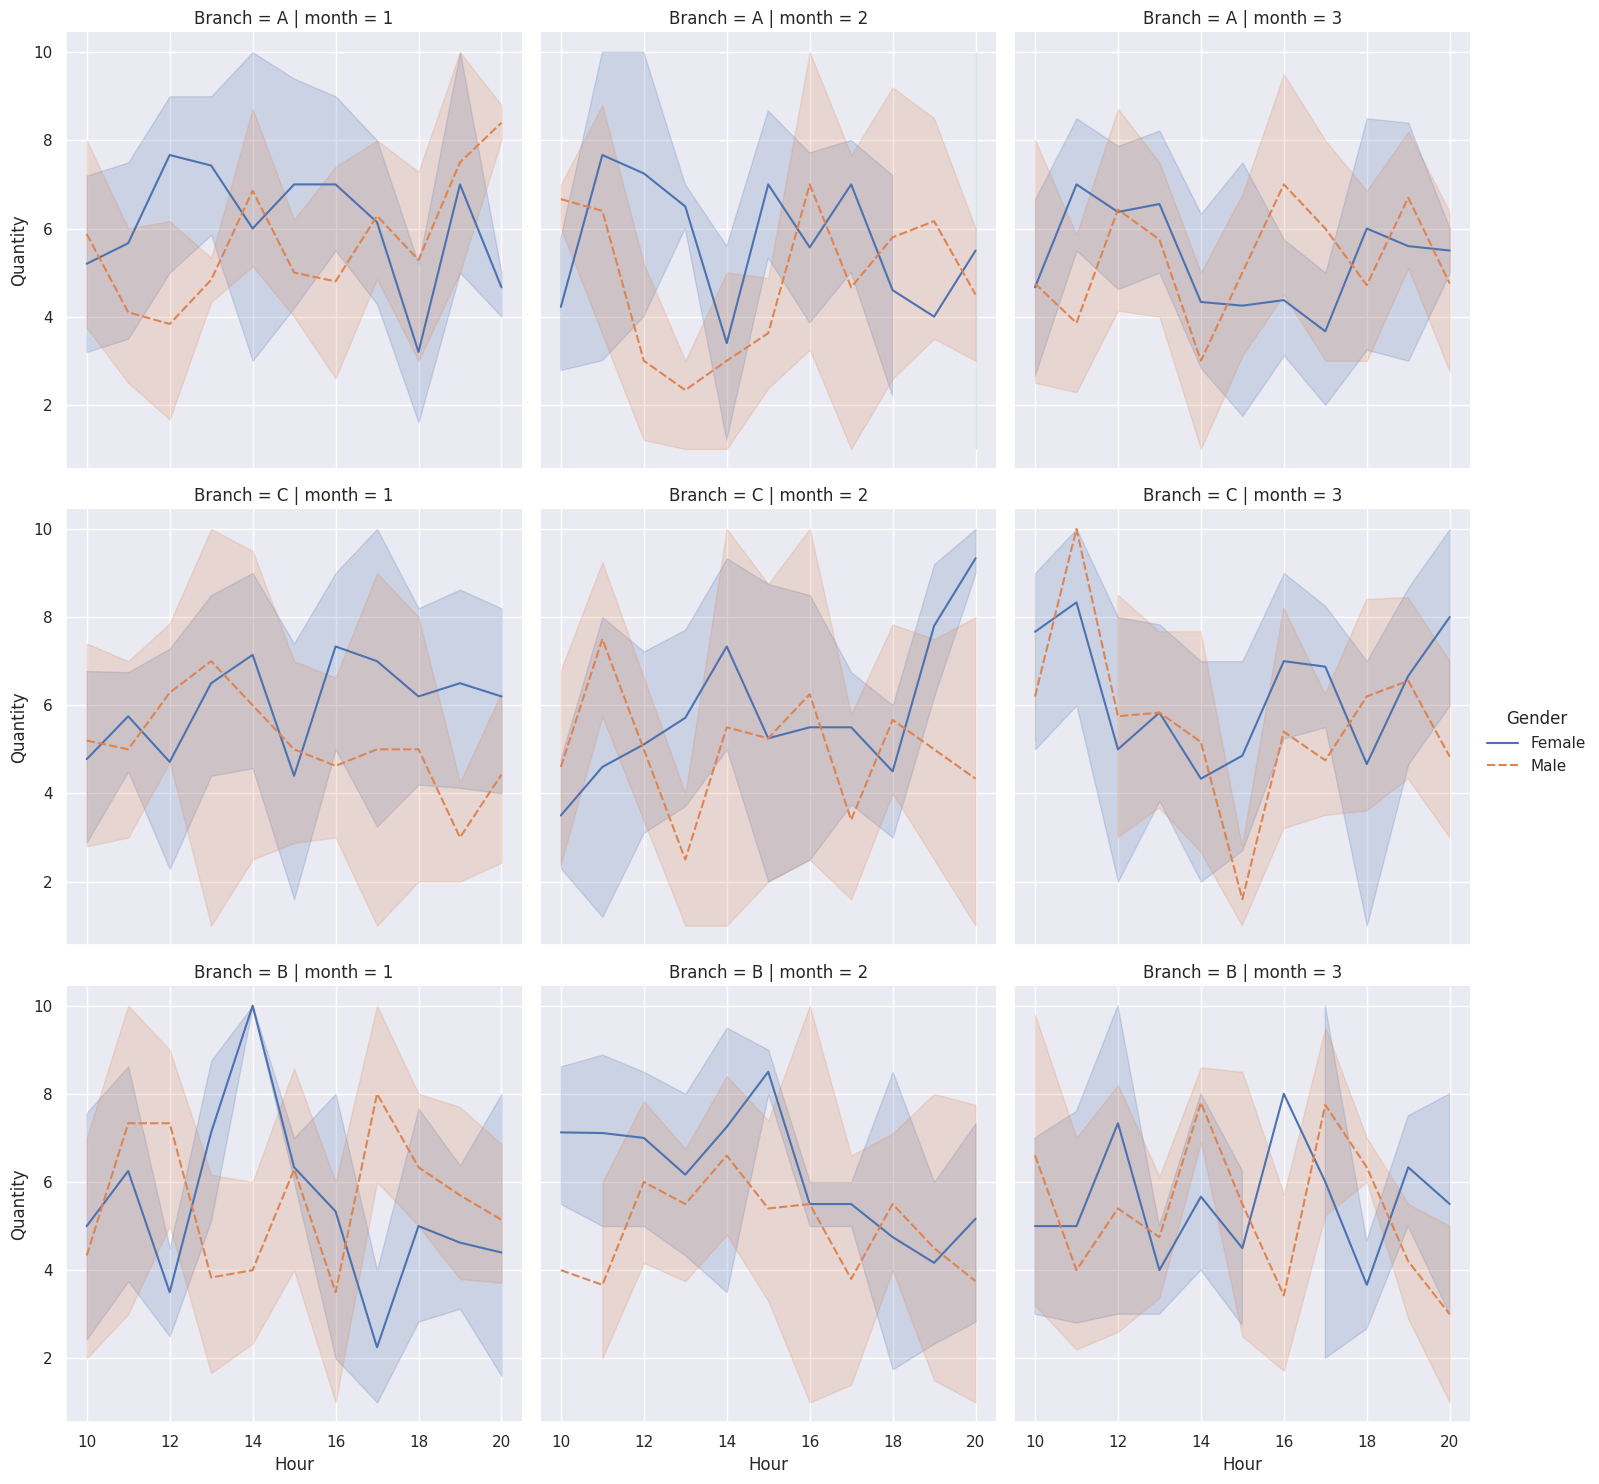

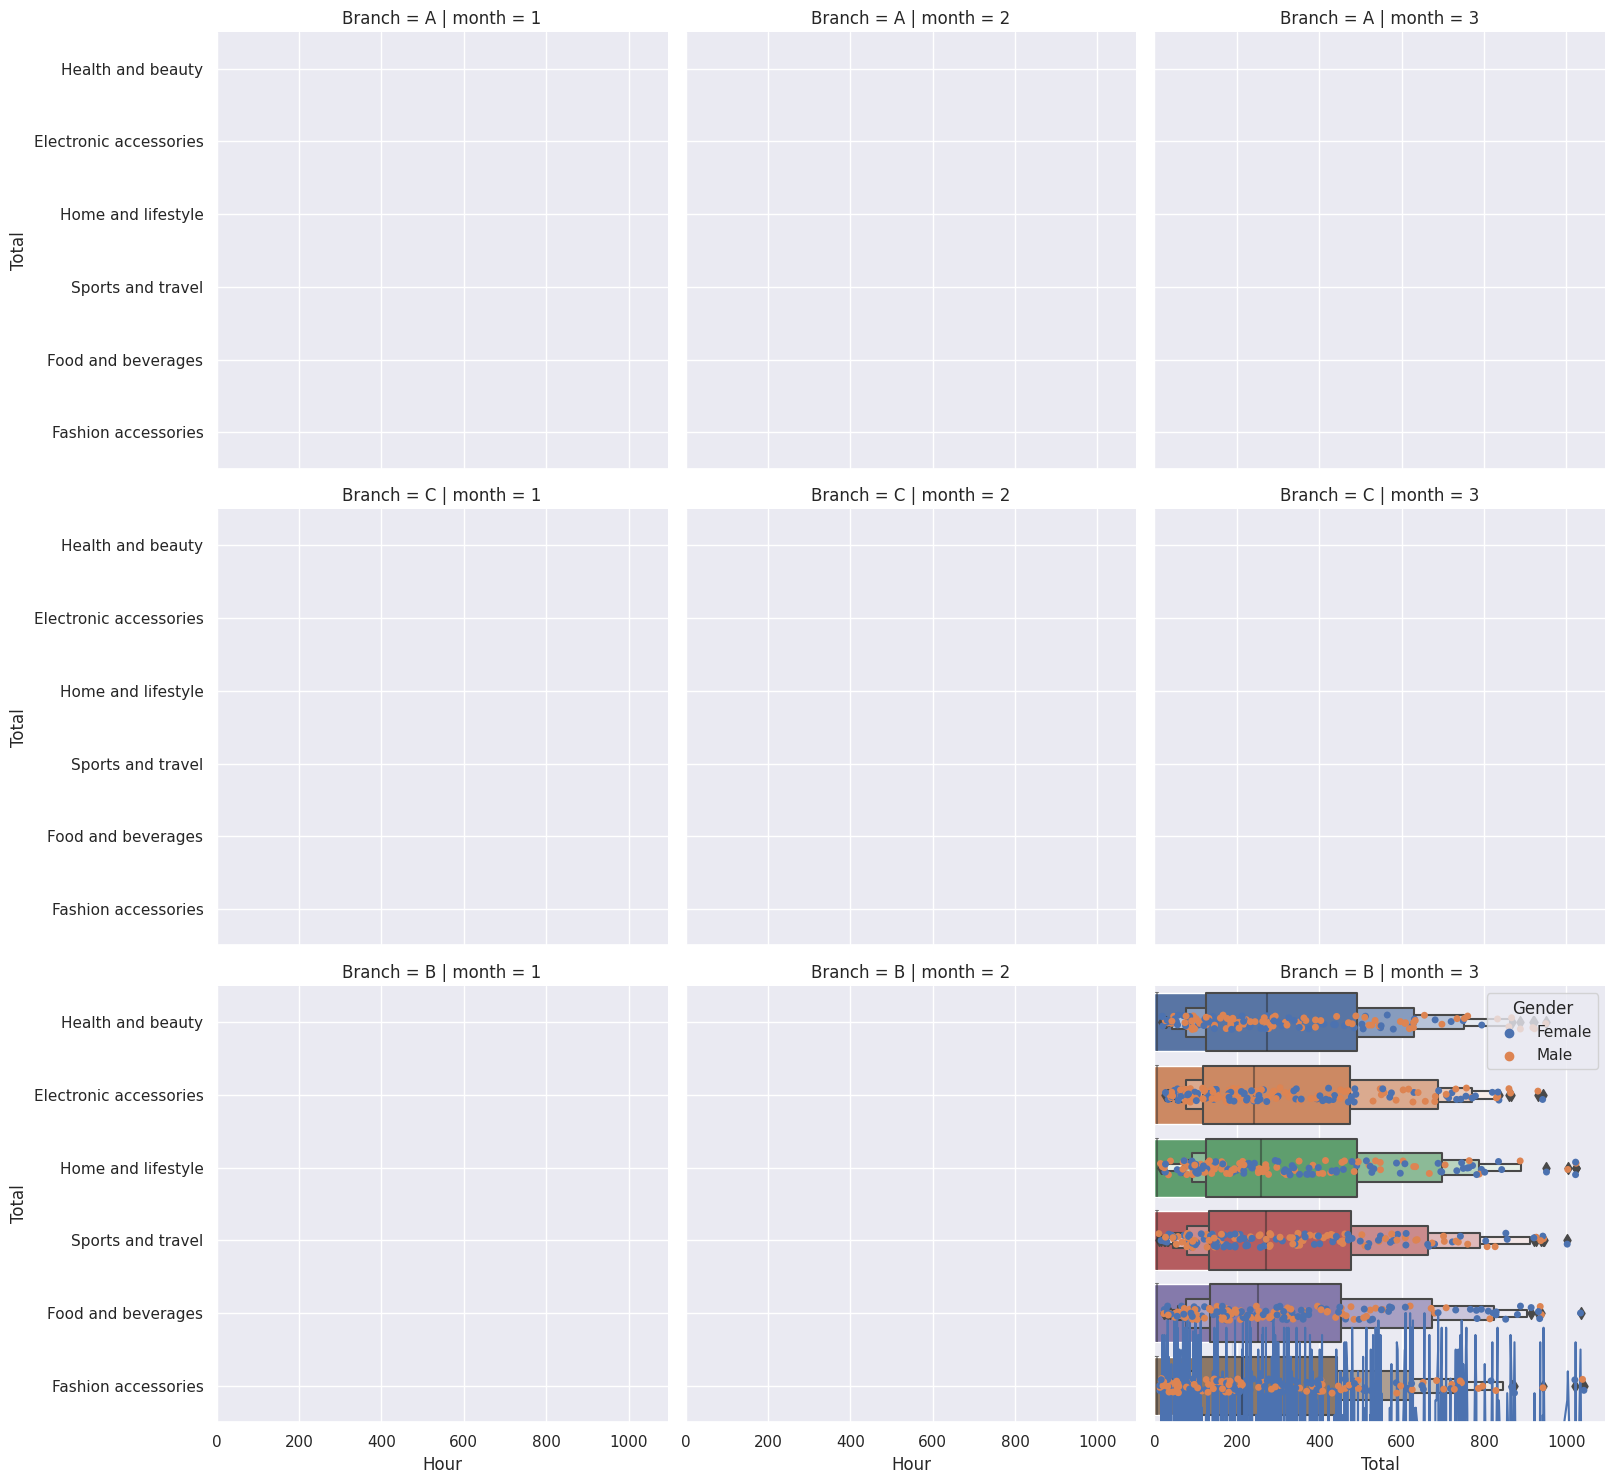

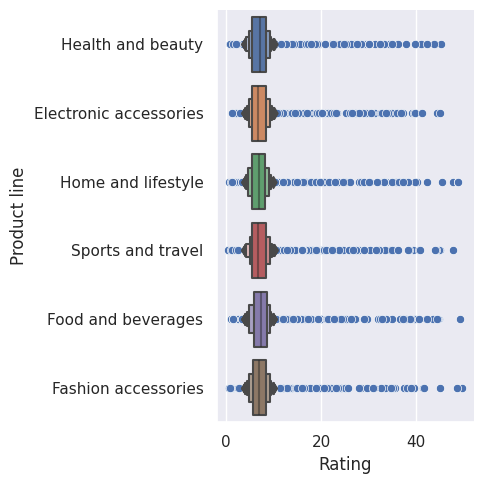

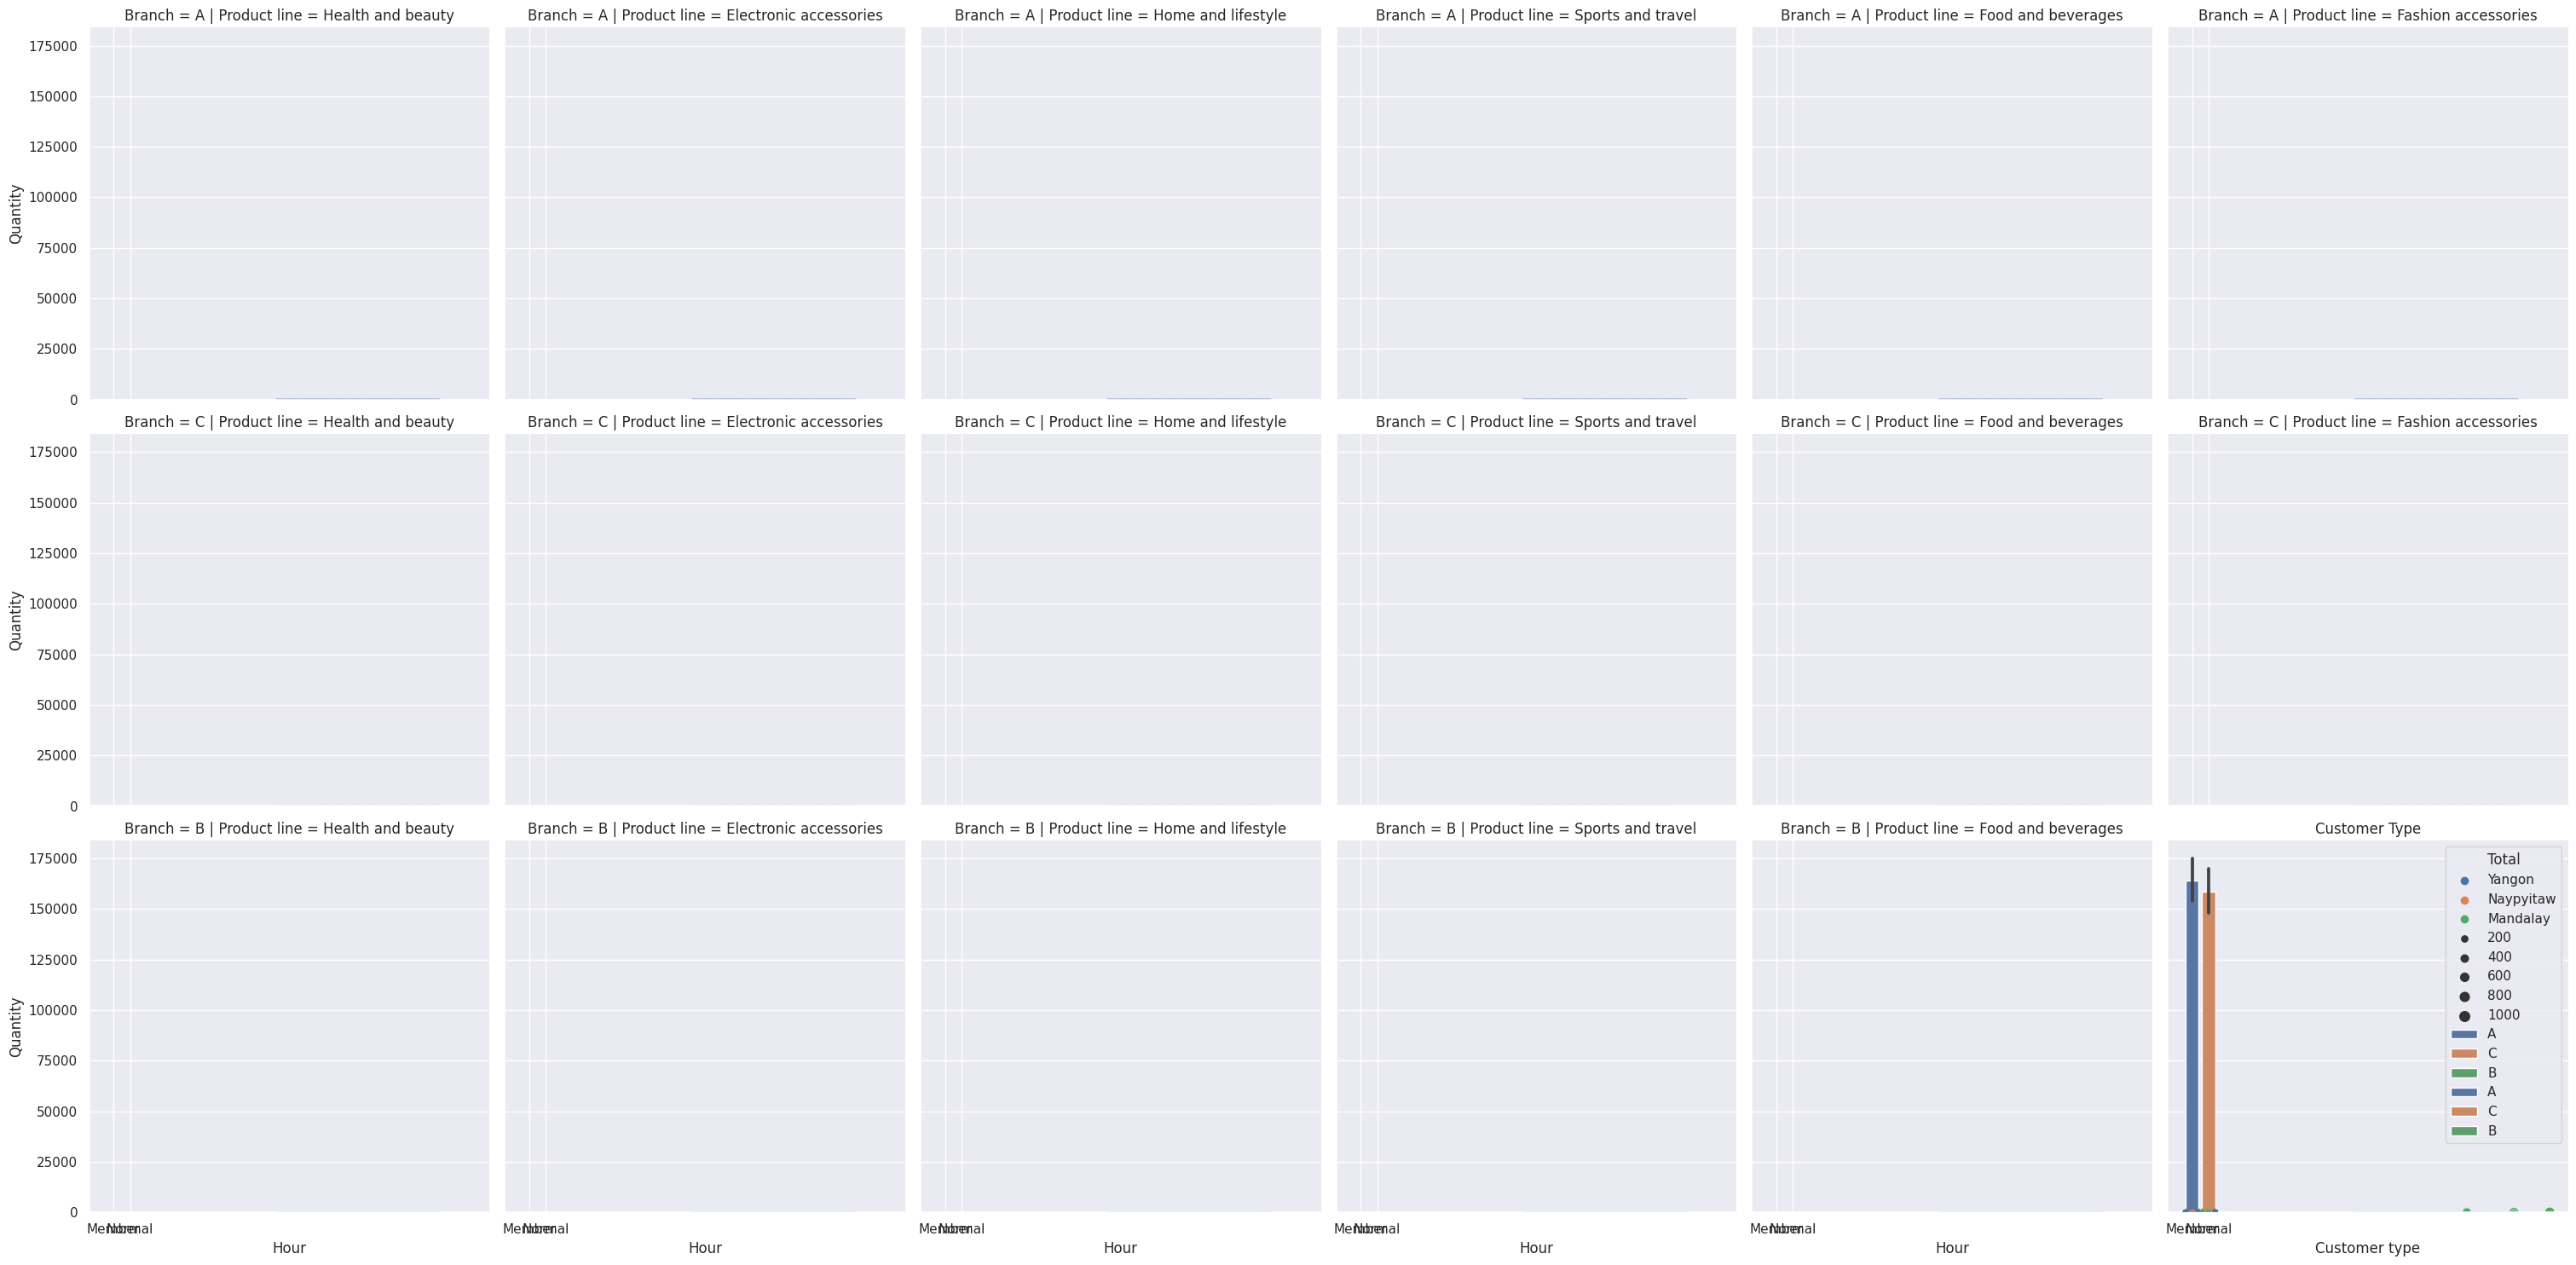

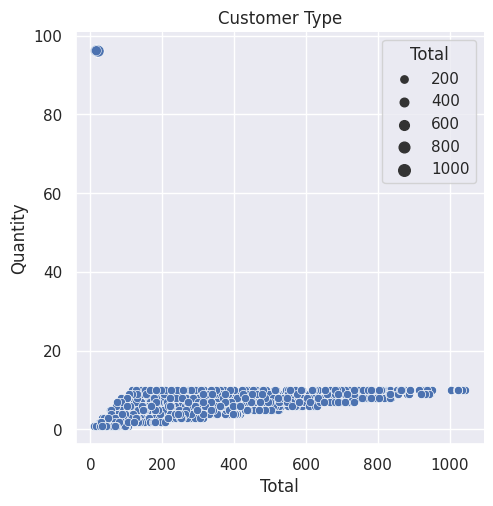

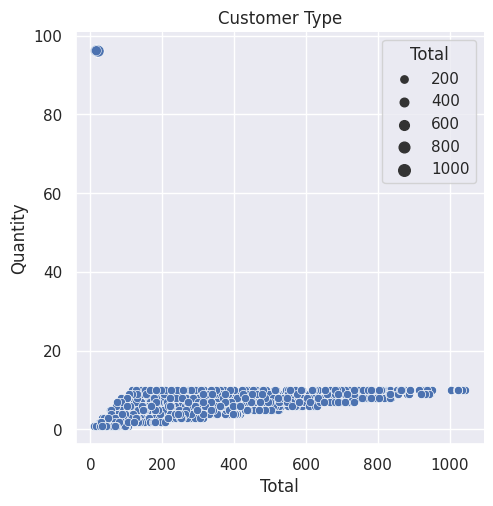

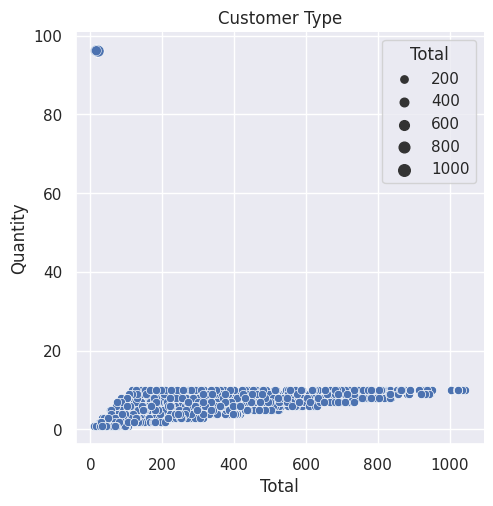

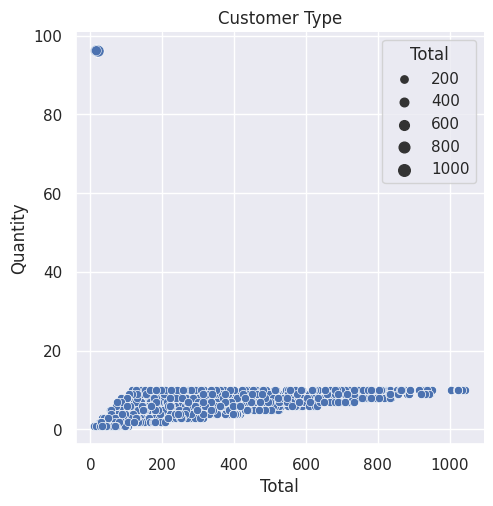

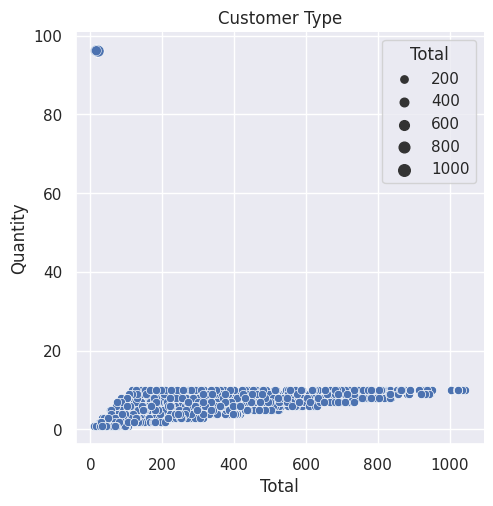

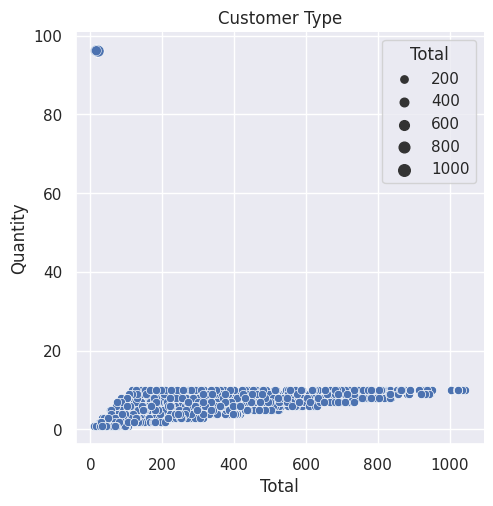

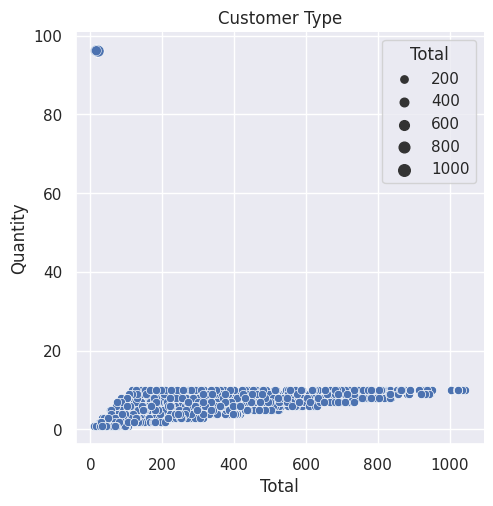

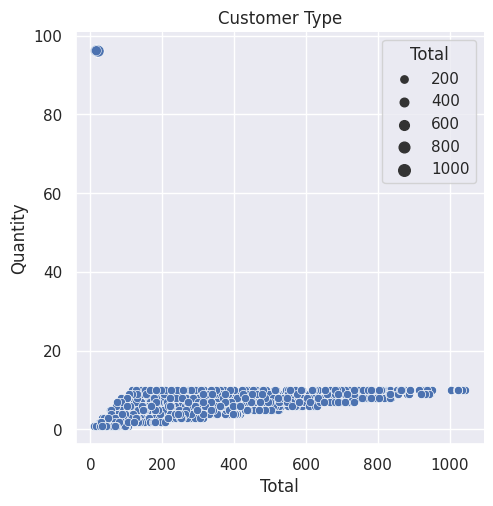

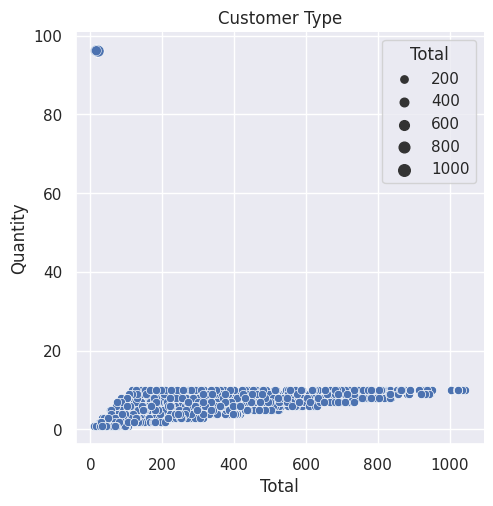

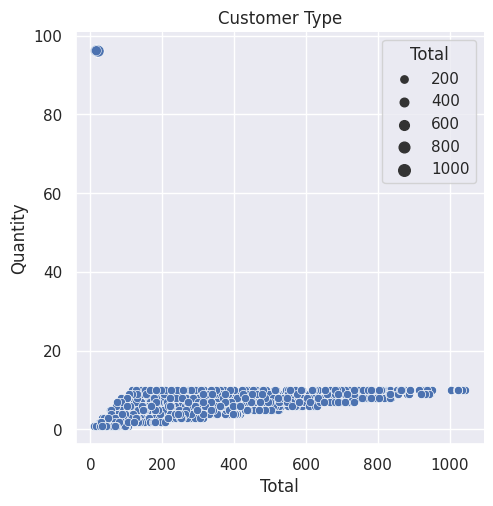

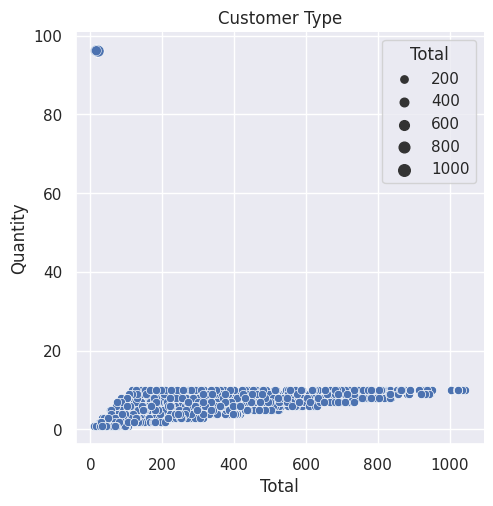

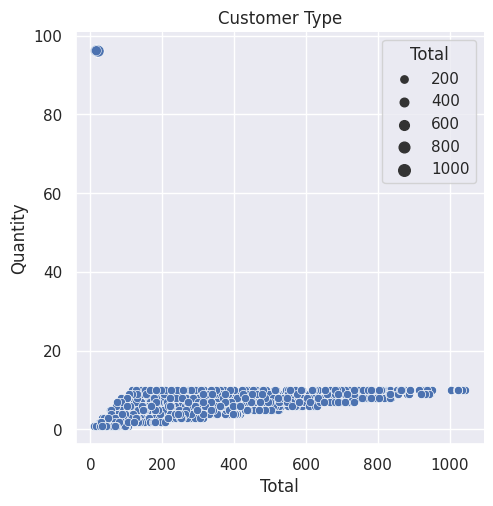

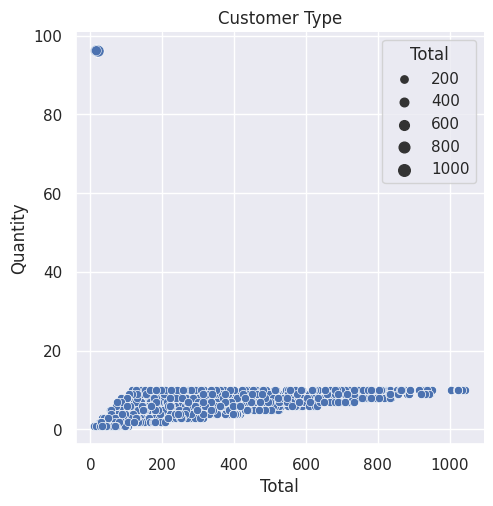

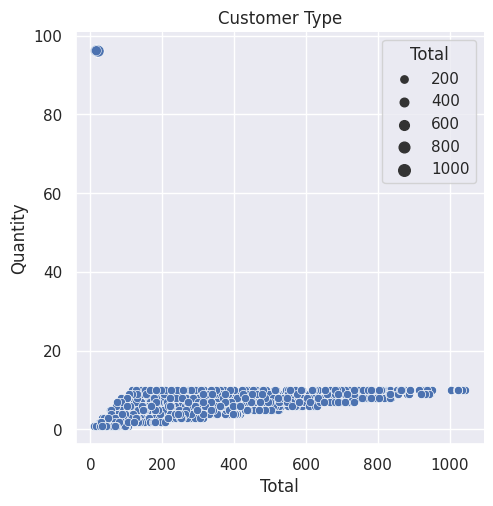

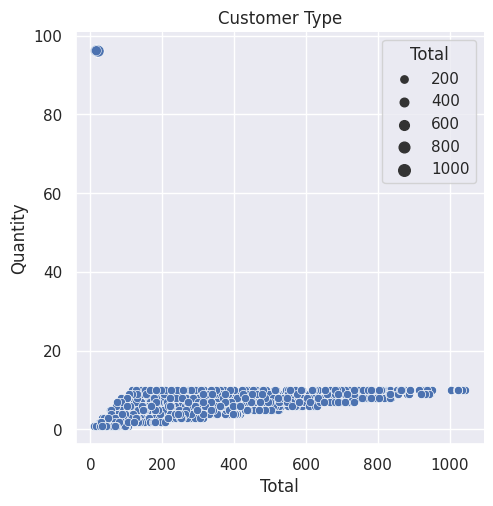

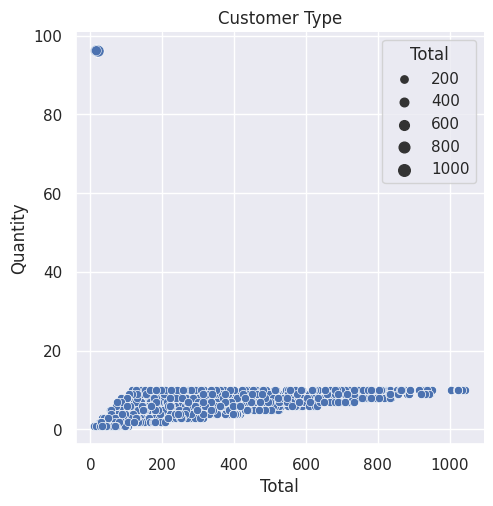

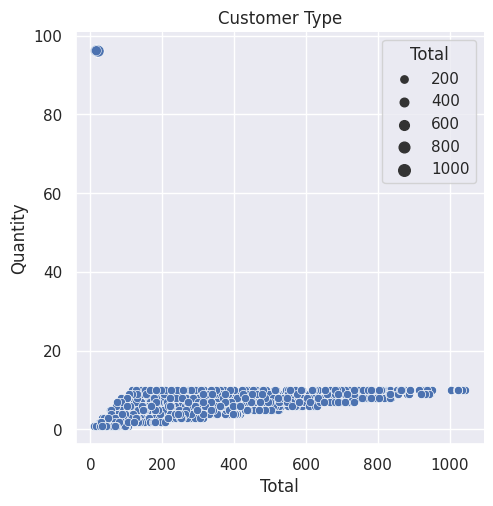

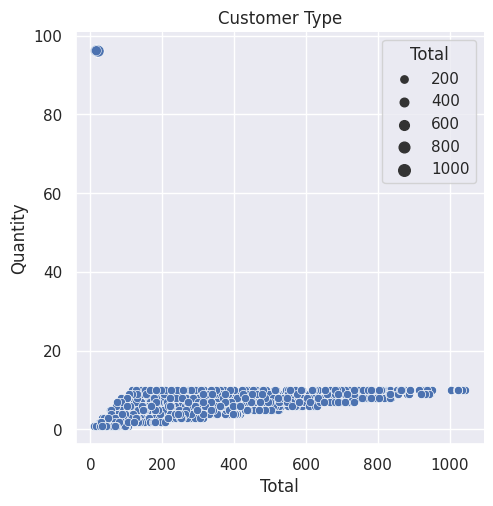

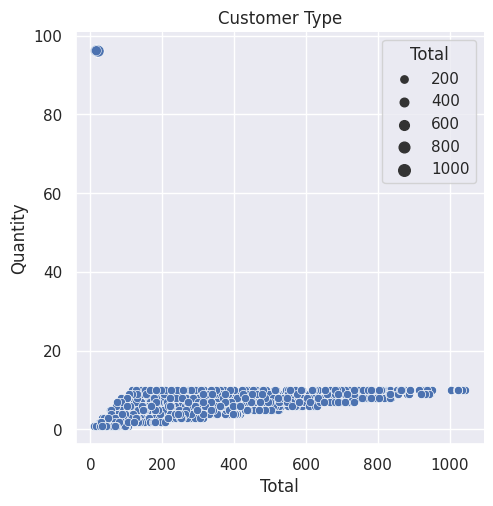

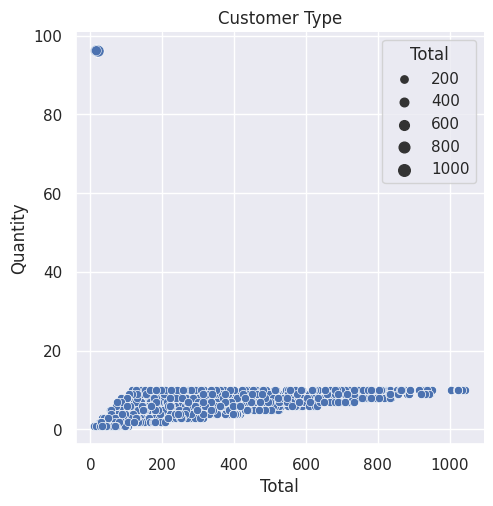

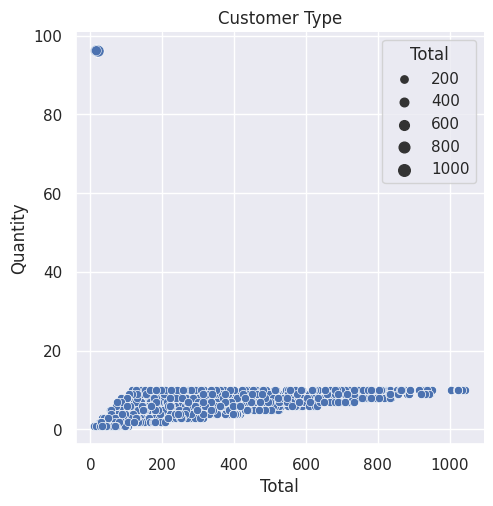

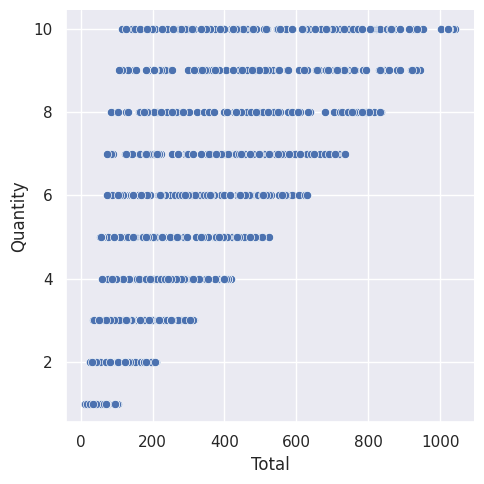

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sales = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
sales.head()
sales.info()
sales['date'] = pd.to_datetime(sales['Date'])
sales['date'].dtype
type(sales['date'])

sales['date'] = pd.to_datetime(sales['date'])

sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

sales['Time'] = pd.to_datetime(sales['Time'])
sales['Hour'] = (sales['Time']).dt.hour    
sales['Hour'].nunique()
sales['Hour'].unique()
sales.describe()

categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]
categorical_columns

print("# unique values in Branch: {0}".format(len(sales['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(sales['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(sales['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(sales['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(sales['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(sales['Payment'].unique().tolist())))

sns.set(style="darkgrid")       #style the plot background to become a grid
genderCount  = sns.countplot(x="Gender", data =sales).set_title("Gender_Count")

sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch") 
genderCount  = sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Product Sales per Hour")

genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =sales)
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)

ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =sales)

sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )

sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )

sns.boxenplot(y = 'Product line', x = 'Total', data=sales )
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales )
sns.relplot(y = 'Product line', x = 'gross income', data=sales )
sns.boxenplot(y = 'Product line', x = 'Rating', data=sales )

productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =sales)

sns.countplot(x="Payment", data =sales).set_title("Payment Channel") 
sns.countplot(x="Payment", hue = "Branch", data =sales).set_title("Payment Channel by Branch") 
sales['Customer type'].nunique()
sns.countplot(x="Customer type", data =sales).set_title("Customer Type") 
sns.countplot(x="Customer type", hue = "Branch", data =sales).set_title("Customer Type by Branch")

sales.groupby(['Customer type']).agg({'Total': 'sum'})
sns.barplot(x="Customer type", y="Total", estimator = sum, data=sales)
sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =sales).set_title("Customer Type") 
long = {"Yangon": 16.8661, "Naypyitaw": 19.7633, "Mandalay": 21.9588 }
lat = {"Yangon": 96.1951, "Naypyitaw": 96.0785, "Mandalay": 96.0891 }
for set in sales:
    sales['long'] = sales['City'].map(long)
    sales['lat'] = sales['City'].map(lat)
    sns.scatterplot(x="long",  y = "lat",size = "Total", data =sales, legend = "brief").set_title("Customer Type") 
    sns.relplot(x="Total",  y = "Quantity", data =sales)